In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Load Data
data = pd.read_csv('UCLA_dataset.csv')

In [4]:
data

,user_id,date,arm,click
0,1,2024-06-30,arm_3,1
1,2,2024-06-30,arm_3,0
2,3,2024-06-30,arm_2,0
3,4,2024-06-30,arm_2,1
4,5,2024-06-30,arm_2,0
...,...,...,...,...
298,299,2024-06-30,arm_3,0
299,300,2024-06-30,arm_1,1
300,301,2024-06-30,arm_3,0
301,302,2024-06-30,arm_1,0


In [5]:
data.arm.value_counts()

arm
arm_3    121
arm_2    101
arm_1     81
Name: count, dtype: int64

In [28]:
def epsilon_greedy(df, epsilon):
    np.random.seed(42)
    arms = df['arm'].unique()  # get unique arms
    rewards = {arm: 0 for arm in arms}  # Initialize rewards
    counts = {arm: 0 for arm in arms}   # Initialize counts
    
    for _, row in df.iterrows():
        if random.uniform(0, 1) < epsilon:  # Explore
            arm = random.choice(arms)
        else:  # Exploit
            arm = max(rewards, key=rewards.get)
        
        click = row['click']  # Use click as reward (1 or 0)
        counts[arm] += 1
        rewards[arm] += (click - rewards[arm]) / counts[arm]
        
    return rewards, counts

In [23]:
def thompson_sampling(df):
    arms = df['arm'].unique()
    alpha = {arm: 1 for arm in arms}
    beta = {arm: 1 for arm in arms}
    
    for _, row in df.iterrows():
        # Sample from Beta distribution for each arm
        sampled_values = {arm: np.random.beta(alpha[arm], beta[arm]) for arm in arms}
        arm = max(sampled_values, key=sampled_values.get)  # Choose arm with highest sample
        
        click = row['click']  # Use click as reward
        if click == 1:
            alpha[arm] += 1
        else:
            beta[arm] += 1
    
    return alpha, beta

thompson_sampling(data)

({'arm_3': 52, 'arm_2': 31, 'arm_1': 54},
 {'arm_3': 66, 'arm_2': 41, 'arm_1': 65})

In [30]:
list3 = []
list2 = []
list1 = []

for epsilon in range(1, 10):
    rewards, counts = epsilon_greedy(data, epsilon/10)
    list3.append(counts['arm_3'])
    list2.append(counts['arm_2'])
    list1.append(counts['arm_1'])
    print(epsilon/10, rewards, counts)

0.1 {'arm_3': 0.4532374100719426, 'arm_2': 0.28571428571428575, 'arm_1': 0.36363636363636365} {'arm_3': 278, 'arm_2': 14, 'arm_1': 11}
0.2 {'arm_3': 0.3488372093023256, 'arm_2': 0.4635193133047209, 'arm_1': 0.40740740740740744} {'arm_3': 43, 'arm_2': 233, 'arm_1': 27}
0.3 {'arm_3': 0.3620689655172413, 'arm_2': 0.4636363636363638, 'arm_1': 0.43999999999999995} {'arm_3': 58, 'arm_2': 220, 'arm_1': 25}
0.4 {'arm_3': 0.45410628019323696, 'arm_2': 0.45454545454545453, 'arm_1': 0.3846153846153846} {'arm_3': 207, 'arm_2': 44, 'arm_1': 52}
0.5 {'arm_3': 0.4635416666666669, 'arm_2': 0.44642857142857123, 'arm_1': 0.3636363636363635} {'arm_3': 192, 'arm_2': 56, 'arm_1': 55}
0.6 {'arm_3': 0.37313432835820903, 'arm_2': 0.39062500000000006, 'arm_1': 0.48837209302325557} {'arm_3': 67, 'arm_2': 64, 'arm_1': 172}
0.7 {'arm_3': 0.4999999999999997, 'arm_2': 0.4252873563218389, 'arm_1': 0.36250000000000004} {'arm_3': 136, 'arm_2': 87, 'arm_1': 80}
0.8 {'arm_3': 0.45555555555555544, 'arm_2': 0.500000000000

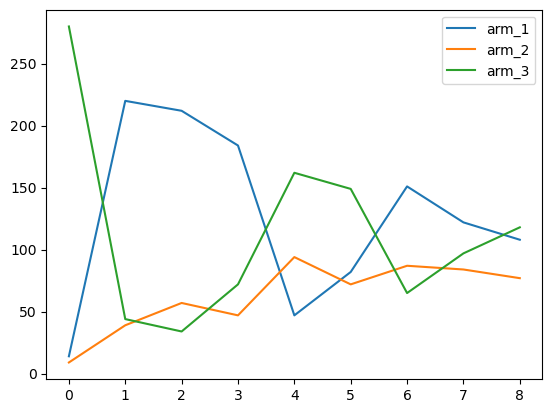

In [20]:
# Plot list1, list2, and list3
plt.plot(list1, label='arm_1')
plt.plot(list2, label='arm_2')
plt.plot(list3, label='arm_3')
plt.legend()

In [ ]:
# Implement a Multi-Arm Bandit Algorithm to determine the best arm
# Implement a random selection algorithm to compare the results
# Implement a greedy algorithm to compare the results
# Implement an epsilon-greedy algorithm to compare the results
# Implement a UCB1 algorithm to compare the results
# Implement a Thompson Sampling algorithm to compare the results
# Implement a Bayesian Bandit algorithm to compare the results
# Implement a Contextual Bandit algorithm to compare the results
# Implement a LinUCB algorithm to compare the results
# Implement a LinThompson algorithm to compare the results
# Implement a LinBayes algorithm to compare the results
# Implement a LinUCB Contextual Bandit algorithm to compare the results
# Implement a LinThompson Contextual Bandit algorithm to compare the results